# 😺 Replicats.ai

### Historical Backtest

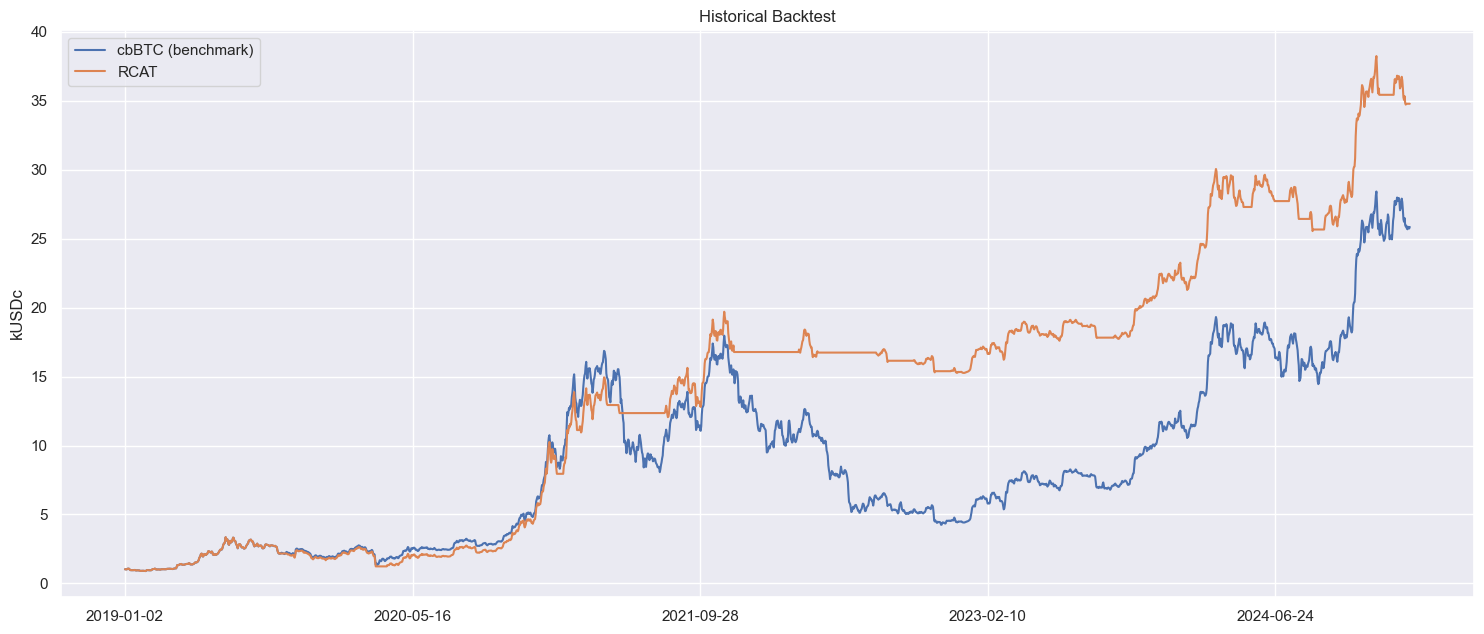

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_theme()

# load log-retuns for cbBTC and RCAT portifolio 
# (simulated "a posteriori" with historical market data)
path = os.path.realpath(os.path.join(os.path.abspath(''), 'log_returns.parquet'))
df = pd.read_parquet(path)

# get cumulative returns (i.e. portolio evolution)
df['cbBTC'] = df[['cbBTC.ln']].apply(np.exp).cumprod()
df['RCAT'] = df[['RCAT.ln']].apply(np.exp).cumprod()

# plot normalized cumulative returns for:
#  a) cbBTC holding portifolio
#  b) RCAT portifolio
ax = df.plot(y=['cbBTC','RCAT'], figsize=(15,6.5), 
             title='Historical Backtest', xlabel='', ylabel='kUSDc')
plt.tight_layout()
ax.legend(['cbBTC (benchmark)', 'RCAT']);

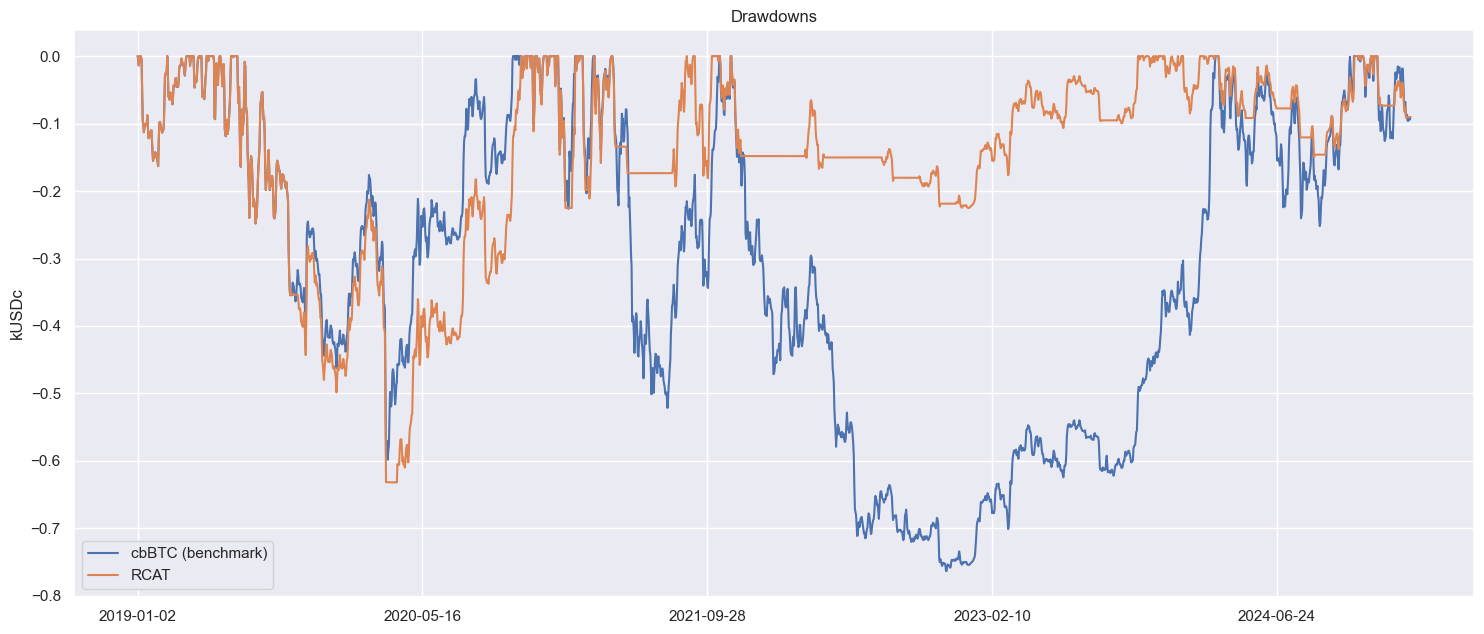

In [2]:
# evaluates downdowns
from backtest import drawdowns
df['cbBTC.drawdown'], _, _ = drawdowns(df['cbBTC.ln'])
df['RCAT.drawdown'], _ , _ = drawdowns(df['RCAT.ln'])

ax = df.plot(y=['cbBTC.drawdown','RCAT.drawdown'], 
        figsize=(15,6.5), title='Drawdowns', xlabel='', ylabel='kUSDc')
plt.tight_layout()
ax.legend(['cbBTC (benchmark)', 'RCAT']);

### Risk-Adjusted Return Metrics

In [3]:
# risk free rate
rf=0.0442
# rolling window
window = 63

from backtest import calculate_ratios
ratios_cbBTC = calculate_ratios(df['cbBTC.ln'], risk_free_rate=rf, rolling_window=window)
ratios_RCAT = calculate_ratios(df['RCAT.ln'], risk_free_rate=rf, rolling_window=window)

import tabulate
data = [
    ['Risk-Adjusted Return Metrics', 'cbBTC (bechmark)','RCAT (historical)'],
    ['Sharpe Ratio', f'{ratios_cbBTC['sharpe_ratio']:.4f}', f'{ratios_RCAT['sharpe_ratio']:.4f}'],
    ['Sortino Ratio', f'{ratios_cbBTC['sortino_ratio']:.4f}', f'{ratios_RCAT['sortino_ratio']:.4f}'],
    ['Calmar Ratio', f'{ratios_cbBTC['calmar_ratio']:.4f}', f'{ratios_RCAT['calmar_ratio']:.4f}'],
    ['Treynor Ratio', f'{ratios_cbBTC['treynor_ratio']:.4f}', f'{ratios_RCAT['treynor_ratio']:.4f}'],
    ['Information Ratio', f'{ratios_cbBTC['information_ratio']:.4f}', f'{ratios_RCAT['information_ratio']:.4f}'],
    ['Omega Ratio', f'{ratios_cbBTC['omega_ratio']:.4f}', f'{ratios_RCAT['omega_ratio']:.4f}'],
    
    ['Risk Metrics','cbBTC (bechmark)','RCAT (historical)'],
    ['Annualized Return', f'{ratios_cbBTC['annualized_return']:.2%}', f'{ratios_RCAT['annualized_return']:.2%}'],
    ['Annualized Volatility', f'{ratios_cbBTC['annualized_volatility']:.2%}', f'{ratios_RCAT['annualized_volatility']:.2%}'],
    ['Maximum Drawdown', f'{ratios_cbBTC['calmar_ratio']:.2%}', f'{ratios_RCAT['calmar_ratio']:.2%}'],
    ['Treynor Ratio', f'{ratios_cbBTC['max_drawdown']:.4f}', f'{ratios_RCAT['max_drawdown']:.4f}'],
    ['Drawdown Duration', f'{ratios_cbBTC['drawdown_duration']} days', f'{ratios_RCAT['drawdown_duration']} days'],
    ['Beta', f'{ratios_cbBTC['beta']:.4f}', f'{ratios_RCAT['beta']:.4f}'],
]
display(tabulate.tabulate(data, tablefmt='html'))

Risk-Adjusted Return Metrics,cbBTC (bechmark),RCAT (historical)
Sharpe Ratio,1.0258,1.4248
Sortino Ratio,1.0025,1.4128
Calmar Ratio,0.6768,1.0455
Treynor Ratio,0.4910,0.6302
Information Ratio,19.5972,27.2212
Omega Ratio,1.1429,1.1890
Risk Metrics,cbBTC (bechmark),RCAT (historical)
Annualized Return,51.66%,66.05%
Annualized Volatility,47.56%,37.64%
Maximum Drawdown,67.68%,104.55%


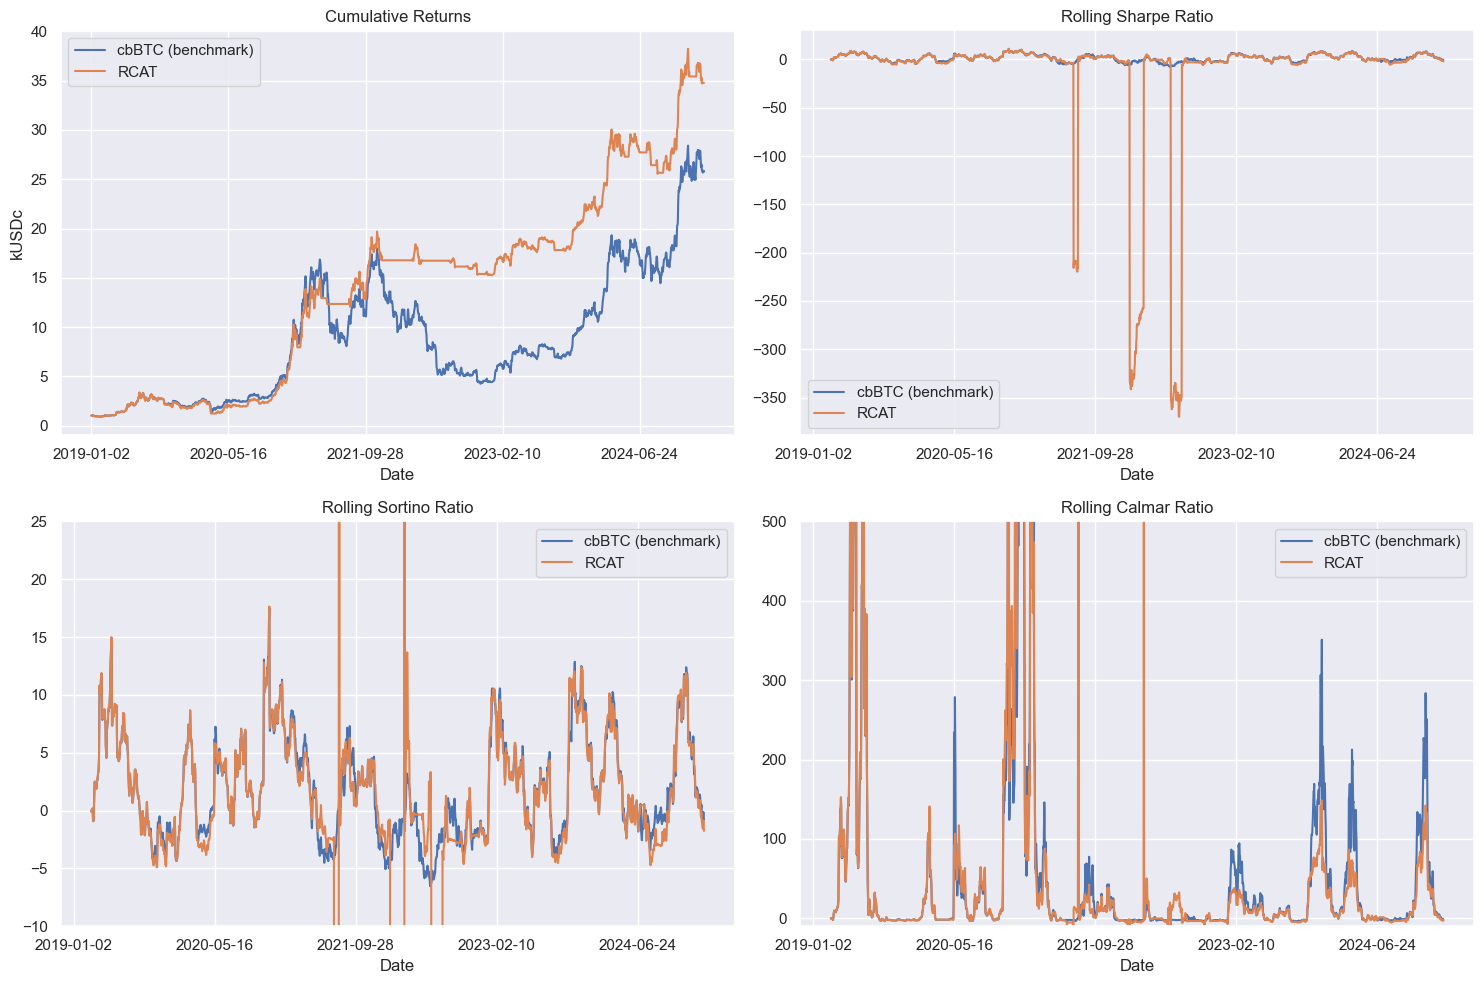

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot cumulative returns
df['cbBTC'].plot(ax=ax1, title='Cumulative Returns')
df['RCAT'].plot(ax=ax1)
ax1.set_ylabel('kUSDc')
ax1.legend(["cbBTC (benchmark)", "RCAT"], loc='upper left')

# Plot rolling ratios
ratios_cbBTC['rolling_sharpe_ratio'].plot(ax=ax2, title='Rolling Sharpe Ratio')
ratios_RCAT['rolling_sharpe_ratio'].plot(ax=ax2)
ax2.legend(["cbBTC (benchmark)", "RCAT"])
        
ratios_cbBTC['rolling_sortino_ratio'].plot(ax=ax3, title='Rolling Sortino Ratio')
ratios_RCAT['rolling_sortino_ratio'].plot(ax=ax3, ylim=(-10, 25))
ax3.legend(["cbBTC (benchmark)", "RCAT"])

ratios_cbBTC['rolling_calmar_ratio'].plot(ax=ax4, title='Rolling Calmar Ratio')
ratios_RCAT['rolling_calmar_ratio'].plot(ax=ax4, ylim=(-10, 500))
ax4.legend(["cbBTC (benchmark)", "RCAT"])

plt.tight_layout()
plt.show()  

In [11]:
from backtest import calculate_var_metrics, calculate_tracking_metrics

confidence_level = 0.95

# rebuild actual price series from cumulative returns
px_last = 96900.99 #  @Feb, 13th

var_cbBTC = calculate_var_metrics(df['cbBTC.ln'], confidence_level)
var_RCAT = calculate_var_metrics(df['RCAT.ln'], confidence_level)
te = calculate_tracking_metrics(df['RCAT.ln'], df['cbBTC.ln'])

data = [
    ['Value at Risk', 'cbBTC (bechmark)','RCAT (historical)'],
    [f'VaR ({confidence_level:.0%})', f'{px_last*(np.exp(var_cbBTC['historical_var'])-1):.2f}', f'{px_last*(np.exp(var_RCAT['historical_var'])-1):.2f}'],
    [f'MVaR ({confidence_level:.0%})', f'{px_last*(np.exp(var_cbBTC['conditional_var'])-1):.2f}', f'{px_last*(np.exp(var_RCAT['conditional_var'])-1):.2f}'],
    [f'CVaR ({confidence_level:.0%})', f'{px_last*(np.exp(var_cbBTC['modified_var'])-1):.2f}', f'{px_last*(np.exp(var_RCAT['modified_var'])-1):.2f}'],
    ['', 'Benchmark Comparison',''],
    ['Tracking Error', f'{te['tracking_error']:.2f}',''],
    ['Information Ratio', f'{te['information_ratio']:.2f}',''],
    ['Alpha', f'{te['alpha']:.2f}',''],
    ['Beta', f'{te['beta']:.2f}',''],
    ['r2', f'{te['r_squared']:.2f}',''],
    ['Up Capture', f'{te['up_capture']:.2%}',''],
]
display(tabulate.tabulate(data, tablefmt='html'))

Value at Risk,cbBTC (bechmark),RCAT (historical)
VaR (95%),-3550.85,-2408.01
MVaR (95%),-5458.78,-4340.34
CVaR (95%),-3237.71,-1735.07
,Benchmark Comparison,
Tracking Error,0.29,
Information Ratio,0.17,
Alpha,0.24,
Beta,0.63,
r2,0.64,
Up Capture,64.80%,


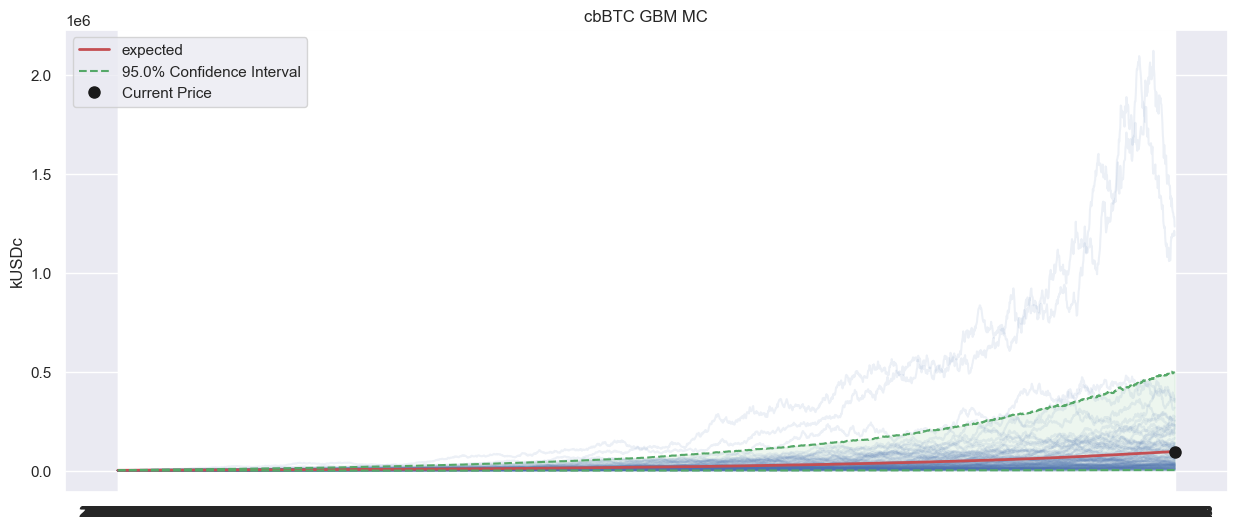

In [6]:
from backtest import monte_carlo_backtest

# plot MC cbBTC
times = df.index.values
mcvar_cbBTC = monte_carlo_backtest(df['cbBTC.ln'], px_last, 10000, confidence_level, times, 'cbBTC GBM MC')

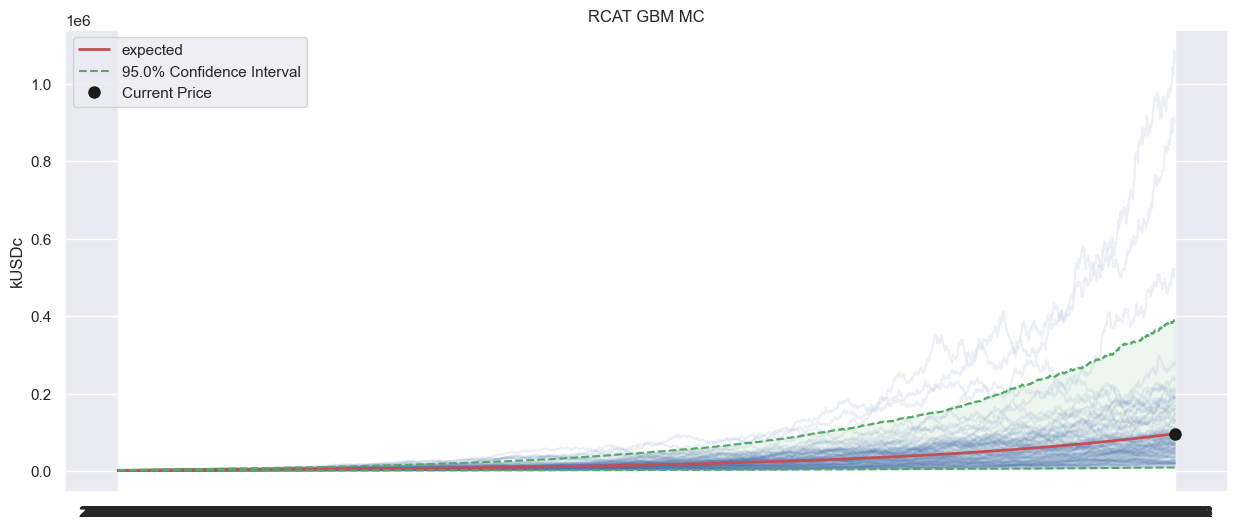

In [7]:
# plot MC RCAT
times = df.index.values
mcvar_RCAT = monte_carlo_backtest(df['RCAT.ln'], px_last, 10000, confidence_level, times, 'RCAT GBM MC')

In [12]:
n_simulations = 50000
times = df.index.values

mcvar_cbBTC = monte_carlo_backtest(df['cbBTC.ln'], px_last, n_simulations, confidence_level)
mcvar_RCAT = monte_carlo_backtest(df['RCAT.ln'], px_last, n_simulations, confidence_level)

data = [
     [f'Stressed Backtest (MC: {n_simulations} scenarios)', 'cbBTC (bechmark)','RCAT'],
     [f'Expected Return', f'{mcvar_cbBTC['expected_return']:.2%}', f'{mcvar_RCAT['expected_return']:.2%}'],
     [f'Value at Risk ({confidence_level:.0%})', f'{mcvar_cbBTC['var']:.2f}', f'{mcvar_RCAT['var']:.2f}'],
     [f'Conditional VaR ({confidence_level:.0%})', f'{mcvar_cbBTC['cvar']:.2f}', f'{mcvar_RCAT['cvar']:.2f}'],
     [f'Average Max Drawdown ({confidence_level:.0%})', f'{mcvar_cbBTC['max_drawdown']:.2%}', f'{mcvar_RCAT['max_drawdown']:.2%}'],
]
display(tabulate.tabulate(data, tablefmt='html'))

Stressed Backtest (MC: 100000 scenarios),cbBTC (bechmark),RCAT
Expected Return,2476.34%,3376.15%
Value at Risk (95%),-1434.91,-1041.87
Conditional VaR (95%),-2416.13,-1779.43
Average Max Drawdown (95%),-99.27%,-99.96%


In [10]:
from backtest import bootstrap_backtest

n_samples=100000
bootstrap_cbBTC = bootstrap_backtest(df['cbBTC.ln'], n_samples=n_samples, sample_length=365)
bootstrap_RCAT = bootstrap_backtest(df['RCAT.ln'], n_samples=n_samples, sample_length=365)

percentile = [int(100 * (1-confidence_level)), int(100 * confidence_level)] 

data = [
    [f'Bootstrap Analysis ({n_samples} samples)', 'cbBTC (bechmark)','RCAT (historical)'],
    [f'Mean Annual Return', f'{np.mean(bootstrap_cbBTC):.2%}', f'{np.mean(bootstrap_RCAT):.2%}'],
    [f'Return Std Dev', f'{np.std(bootstrap_cbBTC):.2%}', f'{np.std(bootstrap_RCAT):.2%}'],    
    [f'{percentile[0]}th Percentile Return', f'{np.percentile(bootstrap_cbBTC, percentile[0]):.2%}', f'{np.percentile(bootstrap_RCAT, percentile[0]):.2%}'],
    [f'{percentile[1]}th Percentile Return', f'{np.percentile(bootstrap_cbBTC, percentile[1]):.2%}', f'{np.percentile(bootstrap_RCAT, percentile[1]):.2%}'],
]
display(tabulate.tabulate(data, tablefmt='html'))

Bootstrap Analysis (100000 samples),cbBTC (bechmark),RCAT (historical)
Mean Annual Return,69.43%,78.48%
Return Std Dev,84.67%,69.60%
5th Percentile Return,-31.96%,-12.12%
95th Percentile Return,229.55%,207.69%
